In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the dataset, handle mixed types and missing values
df = pd.read_csv('operations.csv', low_memory=False)

In [5]:
# Step 3: Data Cleaning
# Convert 'Mission Date' to datetime
df['Mission Date'] = pd.to_datetime(df['Mission Date'], errors='coerce')

In [7]:
# Convert 'Target Latitude', 'Target Longitude', 'Altitude' to float
cols_to_convert = ['Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)', 'High Explosives Weight (Tons)', 
                   'Aircraft Returned', 'Aircraft Damaged', 'Aircraft Lost']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
# Handle missing values: Fill NaNs with 0 for numerical columns
df.fillna(0, inplace=True)

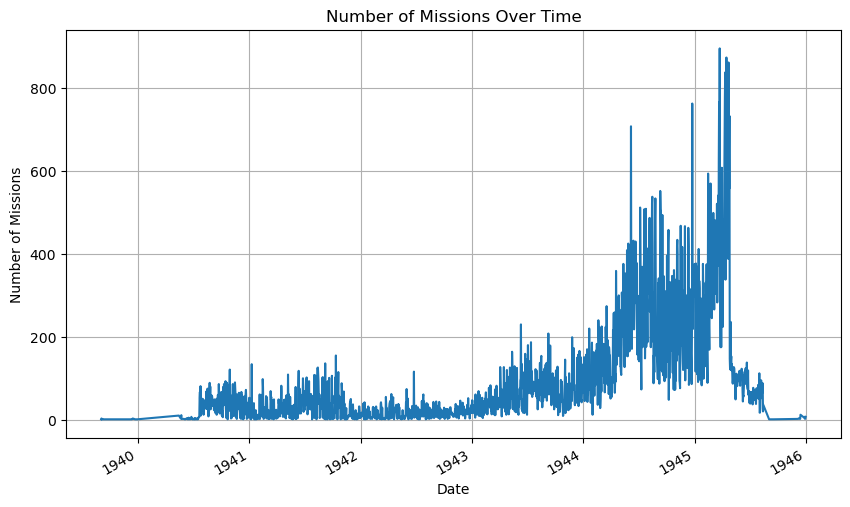

In [11]:
# Step 4: Visualizing key columns
# 4.1. Mission count over time
plt.figure(figsize=(10,6))
df['Mission Date'].value_counts().sort_index().plot()
plt.title('Number of Missions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missions')
plt.grid(True)
plt.show()

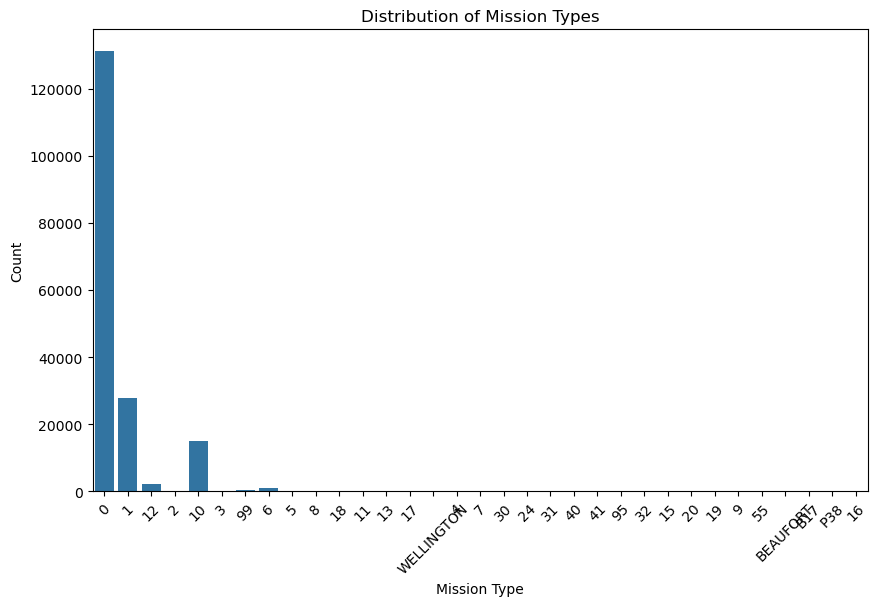

In [13]:
# 4.2. Mission types distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Mission Type')
plt.title('Distribution of Mission Types')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Rajveer\AppData\Local\Temp\ipykernel_3904\3961556559.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Air Force', y='High Explosives Weight (Tons)', ci=None)


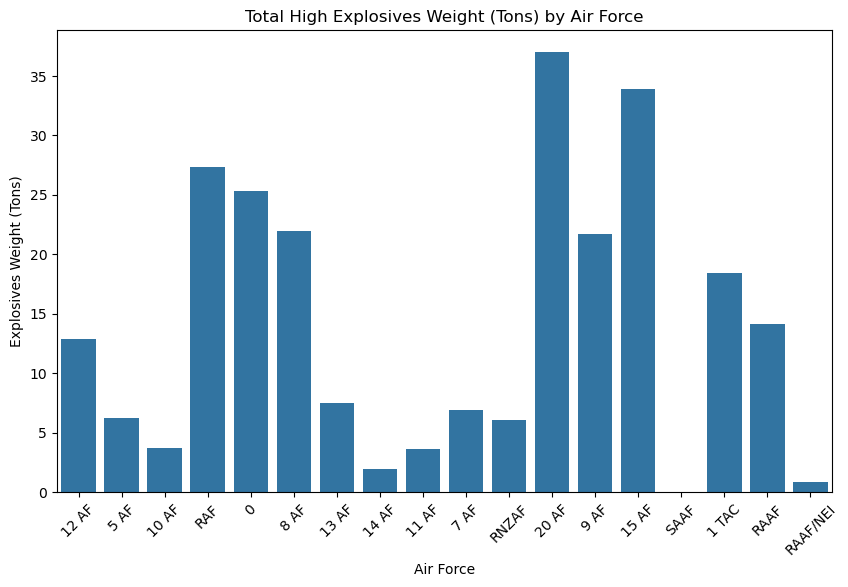

In [15]:
# 4.3. High Explosive Payload by Air Force
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Air Force', y='High Explosives Weight (Tons)', ci=None)
plt.title('Total High Explosives Weight (Tons) by Air Force')
plt.xlabel('Air Force')
plt.ylabel('Explosives Weight (Tons)')
plt.xticks(rotation=45)
plt.show()

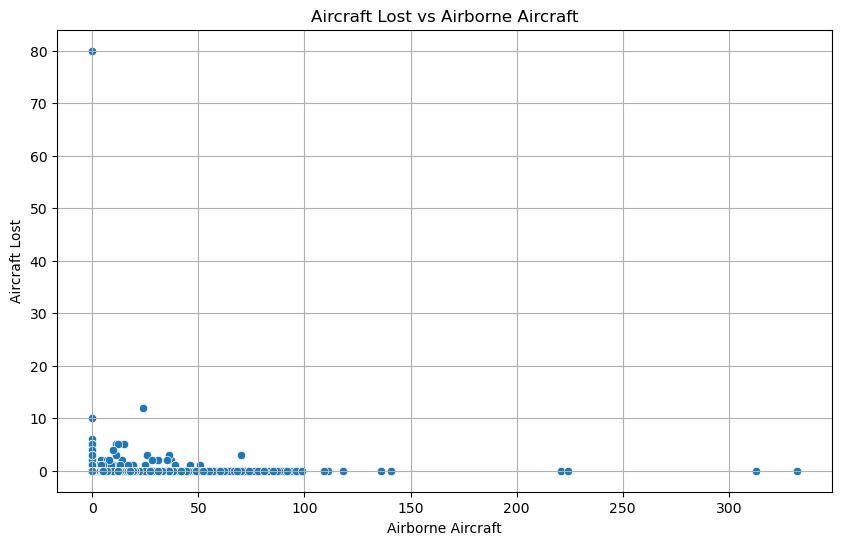

In [17]:
# 4.4. Aircraft lost vs Airborne Aircraft
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Airborne Aircraft', y='Aircraft Lost')
plt.title('Aircraft Lost vs Airborne Aircraft')
plt.xlabel('Airborne Aircraft')
plt.ylabel('Aircraft Lost')
plt.grid(True)
plt.show()

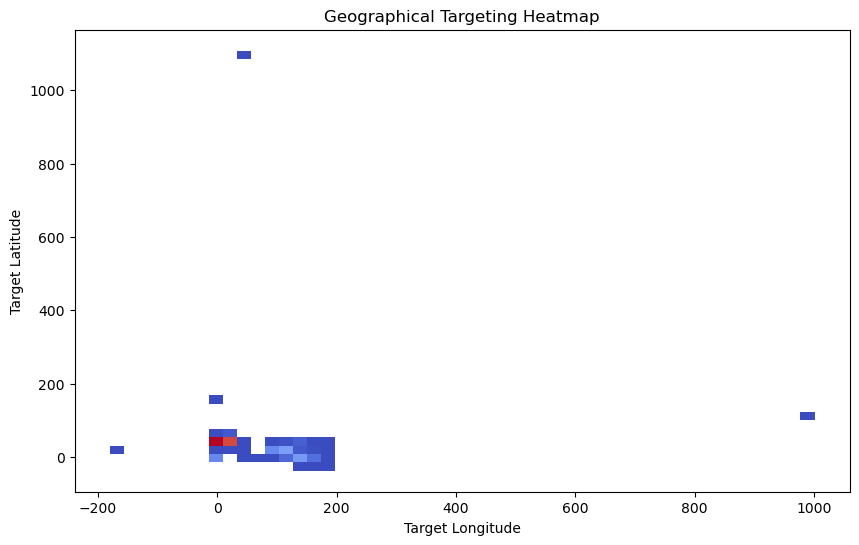

In [19]:
# 4.5. Heatmap for geographical targeting (Target Latitude vs Target Longitude)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Target Longitude', y='Target Latitude', bins=50, pmax=0.9, cmap='coolwarm')
plt.title('Geographical Targeting Heatmap')
plt.xlabel('Target Longitude')
plt.ylabel('Target Latitude')
plt.show()

In [21]:
# Step 5: Insights
# - Total number of missions executed
total_missions = df['Mission ID'].nunique()
print(f"Total number of missions: {total_missions}")

Total number of missions: 178281


In [23]:
# - Total number of aircraft lost
total_aircraft_lost = df['Aircraft Lost'].sum()
print(f"Total number of aircraft lost: {total_aircraft_lost}")

Total number of aircraft lost: 360.121936


In [25]:
# - Total tonnage of explosives dropped
total_explosives_weight = df['High Explosives Weight (Tons)'].sum()
print(f"Total tonnage of explosives dropped: {total_explosives_weight:.2f} tons")

Total tonnage of explosives dropped: 3495957.65 tons
